In [217]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime, timedelta
from math import ceil
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

from dateutil import parser
from dateutil import relativedelta

import plotly.graph_objects as go



In [143]:
#! pip install --upgrade mplfinance
#! pip install -U kaleido

In [144]:
df_adj_close = pd.read_csv(r'../data/adj_close.csv')
df_close = pd.read_csv(r'../data/close.csv')
df_high = pd.read_csv(r'../data/high.csv')
df_low = pd.read_csv(r'../data/low.csv')
df_open = pd.read_csv(r'../data/open.csv')
df_volume = pd.read_csv(r'../data/volume.csv')


In [145]:
df = pd.melt(df_adj_close, id_vars=['Date'], var_name="Cryptocurrency", 
                    value_name='Value')
df.rename(columns={"Value" : 'adj_close'},inplace = True)

In [146]:
data =[df_adj_close,df_close, df_high, df_low, df_open,df_volume]
columns = ['close', 'high', 'low', 'open', 'volume']

In [147]:
for i in data:
    for v in columns: 
        df[v] = pd.melt(i, id_vars=['Date'], var_name="Cryptocurrency", 
                    value_name='Value')['Value']
        df.rename(columns={"Value" : v},inplace = True)

           

In [148]:
#df.to_csv(r'../data/DFconcat.csv')

## Analysis


Source Code: https://towardsdatascience.com/cryptocurrency-analysis-with-python-buy-and-hold-c3b0bc164ffa

In [149]:
df_close['Date']= pd.to_datetime(df_close['Date'])

df['Date']= pd.to_datetime(df['Date'])

In [150]:
cryptocurrencies = ['ADA-USD', 'ATOM-USD', 'AVAX-USD', 'AXS-USD', 'BTC-USD',
       'ETH-USD', 'LINK-USD', 'LUNA1-USD', 'MATIC-USD', 'SOL-USD']

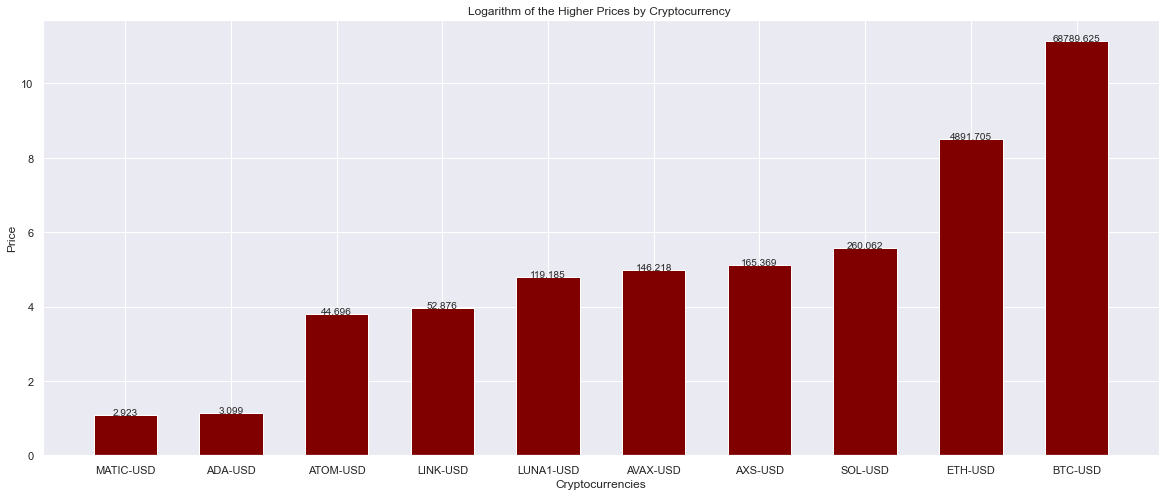

In [151]:
#The maximum price each crypto reached of the higher prices 

df_sorted= df_high[cryptocurrencies].max().sort_values()

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(df_sorted[i],3), ha = 'center')

fig = plt.figure(figsize = (20, 8))
 
# creating the bar plot
plt.bar(df_sorted.index, np.log(df_sorted), color ='maroon',
        width = 0.6)
 
plt.xlabel("Cryptocurrencies")
plt.ylabel("Price")
plt.title("Logarithm of the Higher Prices by Cryptocurrency ")

addlabels(df_sorted.index, np.log(df_sorted))

plt.show()

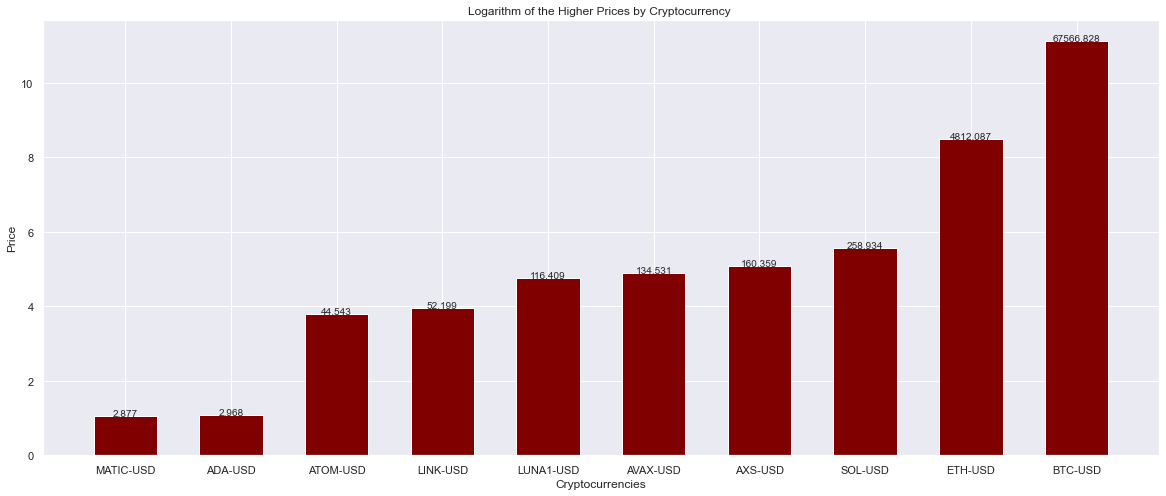

In [152]:
# The higher price of each crypto at closing

df_sorted= df_close[cryptocurrencies].max().sort_values()

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(df_sorted[i],3), ha = 'center')

fig = plt.figure(figsize = (20, 8))
 
# creating the bar plot
plt.bar(df_sorted.index, np.log(df_sorted), color ='maroon',
        width = 0.6)
 
plt.xlabel("Cryptocurrencies")
plt.ylabel("Price")
plt.title("Logarithm of the Higher Prices by Cryptocurrency ")

addlabels(df_sorted.index, np.log(df_sorted))

plt.show()

In [153]:
gold = ['BTC-USD','ETH-USD']
silver = ['ATOM-USD', 'AVAX-USD', 'AXS-USD', 'LINK-USD', 'LUNA1-USD','SOL-USD']
bronze = ['MATIC-USD','ADA-USD']

In [154]:
df_sol = pd.read_csv(r'../data/cryptoInd/sol_ind.csv')

In [155]:
df_sol

,Date,adj_close,close,low,high,open,volume,SMA30,CMA30,EMA30,...,bb_high,macd,macdsignal,macdhist,rsi,stdev,slowk,slowd,dollar_close,sp500_close
0,2020-05-13,0.550532,0.550532,0.518038,0.564874,0.538372,2.326446e+06,0.630456,0.658397,0.603585,...,0.773171,-0.041228,-0.028529,-0.012699,36.035358,0.071357,23.592362,18.768069,100.291000,2820.000000
1,2020-05-14,0.569118,0.569118,0.550110,0.580946,0.550532,2.047897e+06,0.618675,0.655847,0.599277,...,0.750072,-0.039807,-0.030785,-0.009022,38.130968,0.065699,40.929769,26.836762,100.507004,2852.500000
2,2020-05-15,0.559752,0.559752,0.547093,0.574620,0.569193,1.850070e+06,0.609922,0.653177,0.594336,...,0.738327,-0.038987,-0.032425,-0.006561,37.468194,0.064203,56.470298,40.330810,100.433998,2863.699951
3,2020-05-18,0.652670,0.652670,0.609649,0.674393,0.612682,3.314359e+06,0.592627,0.650748,0.604126,...,0.680708,-0.022666,-0.030375,0.007709,47.820515,0.044041,84.447855,80.017372,99.681000,2953.909912
4,2020-05-19,0.624454,0.624454,0.611248,0.654480,0.650974,2.380263e+06,0.589758,0.650090,0.606667,...,0.670386,-0.018956,-0.028092,0.009135,45.216883,0.040314,73.811425,79.689734,99.365997,2922.939941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2022-04-19,108.582031,108.582031,101.301727,108.582031,102.202385,1.711910e+09,107.742056,56.135475,106.692858,...,122.940242,-0.750396,0.956023,-1.706418,51.698578,7.599093,57.165963,38.064413,100.963997,4462.209961
488,2022-04-20,105.497002,105.497002,104.772659,110.722977,108.602196,1.761532e+09,106.317707,56.202090,106.543376,...,117.574949,-0.738744,0.617069,-1.355814,49.144510,5.628621,74.486018,55.453260,100.417000,4459.450195
489,2022-04-21,101.776138,101.776138,100.767151,109.765327,105.497673,1.838572e+09,105.577224,56.263510,105.947471,...,116.464692,-1.018018,0.290052,-1.308070,46.195342,5.443734,69.481850,67.044610,100.613998,4393.660156
490,2022-04-22,100.612053,100.612053,99.579430,103.498146,101.757423,1.274794e+09,104.364927,56.323199,105.280544,...,112.887396,-1.318082,-0.031575,-1.286507,45.284427,4.261235,47.710119,63.892662,101.212997,4271.779785


In [156]:
#Candelstick for SOL-USD

import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = go.Figure(data=[go.Candlestick(x=df_sol['Date'],
                open=df_sol['open'],
                high=df_sol['high'],
                low=df_sol['low'],
                close=df_sol['close'])])

fig.show()

In [157]:
df_high.describe()

,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
count,1629.000000,1139.000000,583.000000,538.000000,1826.000000,1629.000000,1629.000000,1005.000000,1094.000000,746.000000
mean,0.517245,12.778245,45.504667,46.068519,18504.529287,1102.866267,9.718100,18.761969,0.574255,59.203741
std,0.696980,11.856017,36.919261,47.519941,18123.144096,1293.636227,11.654902,29.721443,0.787871,71.855456
min,0.025993,1.813534,2.939915,0.149547,1294.829956,85.342743,0.166283,0.137031,0.003380,0.559759
25%,0.056926,3.964141,12.434371,4.056442,6601.734985,203.500549,0.515894,0.312570,0.017333,2.252829
50%,0.125663,5.646225,34.697552,44.936834,9460.083984,406.303955,2.874556,1.119922,0.024612,28.238139
75%,0.956904,22.361992,78.041763,73.827532,33931.668945,1843.818848,16.744186,26.812210,1.346856,103.409777
max,3.099186,44.695526,146.217865,165.369080,68789.625000,4891.704590,52.876087,119.184624,2.923235,260.062103


In [158]:
# diference between the max and minimum value for each crypto
df_high.describe().iloc[7] - df_high.describe().iloc[3]

ADA-USD          3.073193
ATOM-USD        42.881992
AVAX-USD       143.277950
AXS-USD        165.219533
BTC-USD      67494.795044
ETH-USD       4806.361847
LINK-USD        52.709804
LUNA1-USD      119.047593
MATIC-USD        2.919855
SOL-USD        259.502344
dtype: float64

In [159]:
df_close['Date'].min()

Timestamp('2017-04-26 00:00:00')

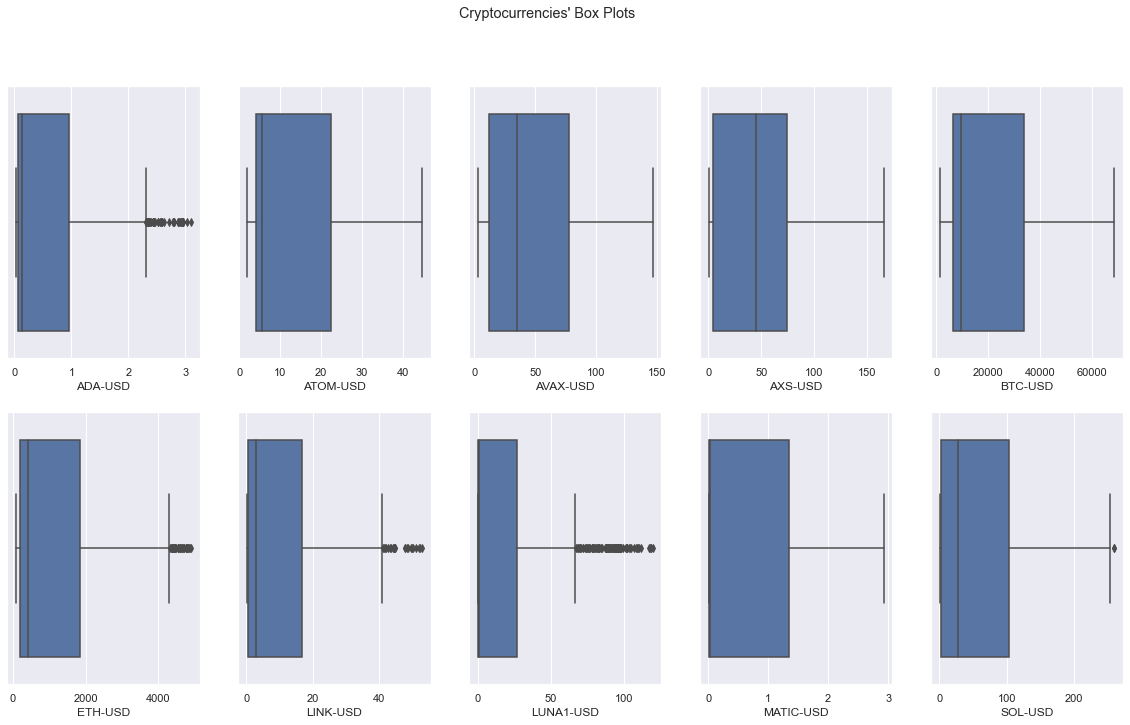

In [ ]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(cryptocurrencies) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(),cryptocurrencies): 
    sns.boxplot(x=df_high[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Cryptocurrencies' Box Plots"

plt.suptitle(title)
plt.show()

28.238139152526855


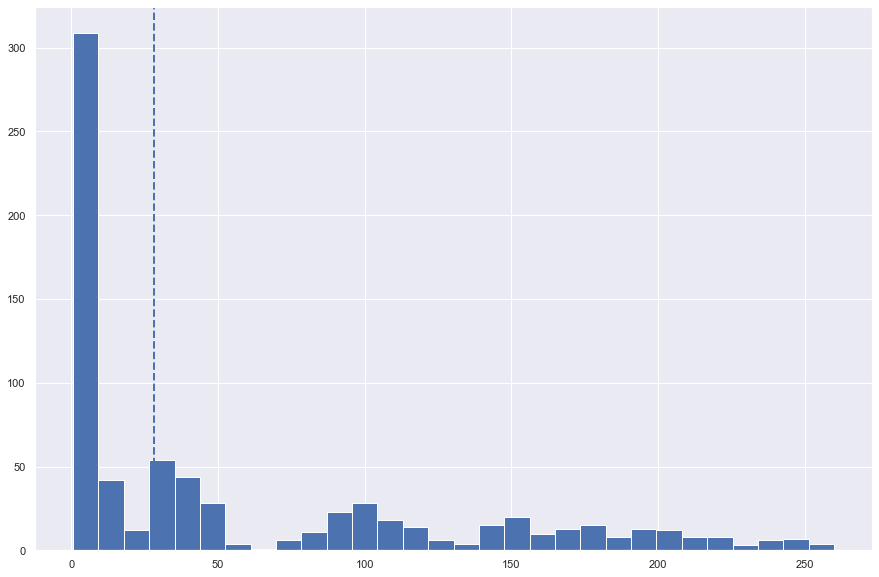

In [ ]:
#Histogram for Sol-USD using median

df_high['SOL-USD'].hist(bins=30, figsize=(15,10)).axvline(df_high['SOL-USD'].median(), color='b', linestyle='dashed', linewidth=2)

print(df_high['SOL-USD'].median())

Observations: 
- SOL-USD closing price was not over $50 for many hours.
- it has right-skewed distribution because a natural limit prevents outcomes on one side.
- blue dashed line (median) shows that half of the time closing prices were under $28.24.



#### Visualize absolute closing prices

<AxesSubplot:>

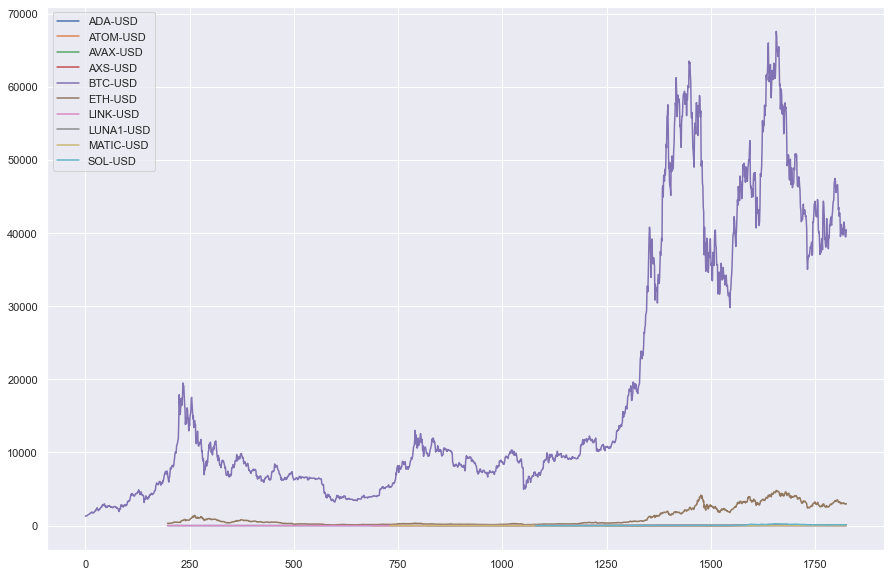

In [ ]:
df_close.plot(grid=True, figsize=(15, 10))

#### Visualize relative changes in closing prices

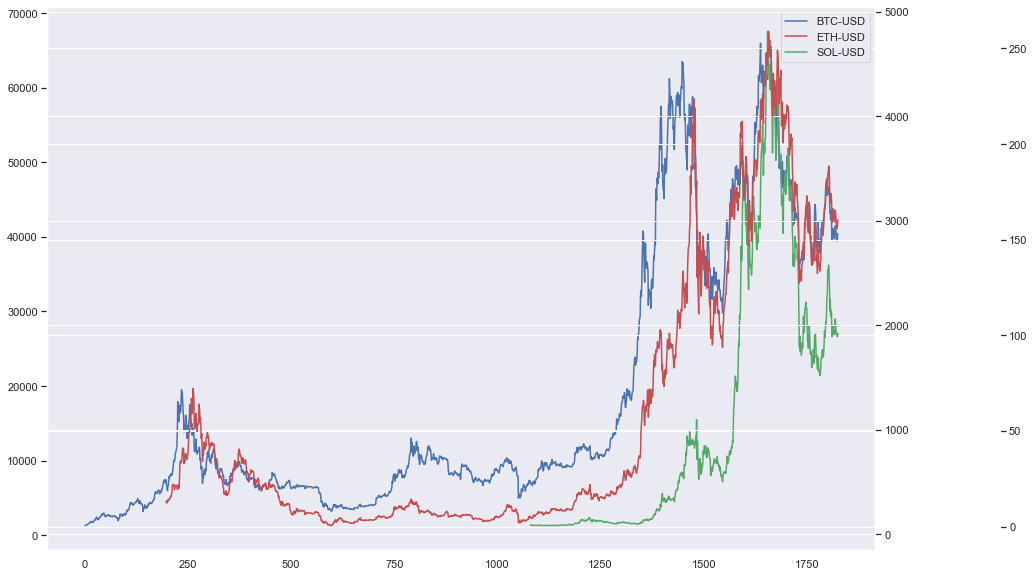

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df_close['BTC-USD'].plot(ax=ax1, style='b-')
df_close['ETH-USD'].plot(ax=ax1, style='r-', secondary_y=True)
df_close['SOL-USD'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC-USD', 'ETH-USD', 'SOL-USD'])

We are interested in a relative change of the price rather than in absolute price, so we use three different y-axis scales.

We see that closing prices move in tandem. When one coin closing price increases so do the other.

### Measure the correlation of closing prices

<AxesSubplot:>

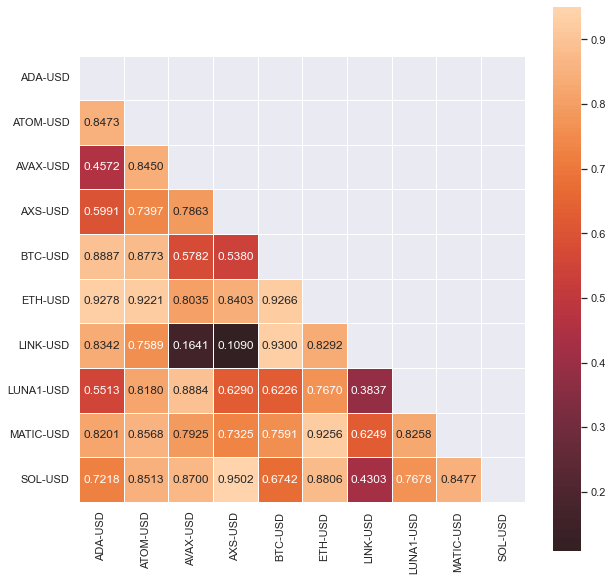

In [ ]:
# Compute the correlation matrix
corr = df_close.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Log Returns 

In [ ]:
# shift moves dates back by 1
df_log = df_close.set_index('Date').apply(lambda x: np.log(x) - np.log(x.shift(1))) 

In [ ]:
df_sample = df_log.copy()

In [ ]:
df_close.columns

Index(['Date', 'ADA-USD', 'ATOM-USD', 'AVAX-USD', 'AXS-USD', 'BTC-USD',
       'ETH-USD', 'LINK-USD', 'LUNA1-USD', 'MATIC-USD', 'SOL-USD'],
      dtype='object')

In [ ]:
df_sample.drop(columns = )

SyntaxError: invalid syntax (Temp/ipykernel_10584/815703694.py, line 1)

In [ ]:
crypto_sample= ['SOl-USD', 'BTC-USD', 'ETH-USD']


Visualize Log Returns

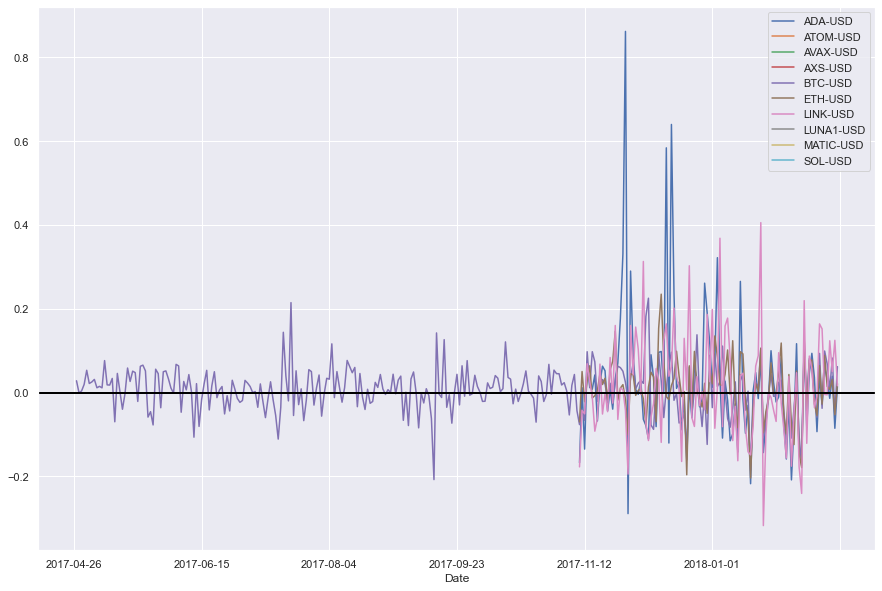

In [ ]:
# We plot normalized changes of closing prices for last 300 days
# Log differences can be interpreted as the percentage change.
df_log[:300].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)